# 1. Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split as tts

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# 2. Data Load

In [2]:
data = pd.read_csv('Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 3. Data Split

In [3]:
x_train, x_test, y_train, y_test = tts(
    data.iloc[:, :-1], data.iloc[:, -1:], test_size=0.1, random_state=400)

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27, 1) (3, 1) (27, 1) (3, 1)


# 4. Data Visualize

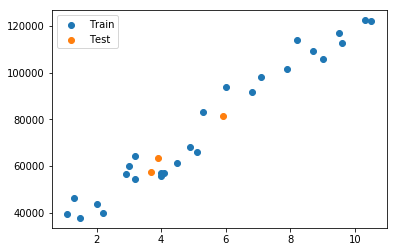

In [5]:
plt.figure()
plt.scatter(x_train, y_train, label="Train")
plt.scatter(x_test, y_test, label="Test")
plt.legend()
plt.show()

# 5. Linear Regression

In [6]:
class RegressionModel:
    def __init__(self, x, y):
        self.scalex = sc()
        self.scaley = sc()
        self.x = self.add_col(self.scalex.fit_transform(x))
        self.y = self.scaley.fit_transform(y)

        self.theta = np.random.randn(1, 2)
        self.m = x.shape[0]

    def add_col(self, x):
        m = x.shape[0]
        one_mat = np.ones((m, 1))
        return np.concatenate([one_mat, x], axis=1)

    def check_format(self, x, y=np.array([[]])):
        if x.shape[1] == 0:
            x = self.x
            y = self.y
        elif x.shape[1] != 2:
            x = self.add_col(self.scalex.fit_transform(x))
            if y.shape[1] != 0:
                y = self.scaley.fit_transform(y)

        return x, y

    def pred(self, x=np.array([[]]), real=False):
        x, _ = self.check_format(x)
        y_pred = np.matmul(x, self.theta.T)

        if real:
            return self.scaley.inverse_transform(y_pred)

        return y_pred

    def train(self, epoch=1000, alpha=0.001):

        fig = plt.figure()
        ax1 = fig.add_subplot(1, 1, 1)

        for i in range(epoch):
            error = self.pred()-self.y
            differ = np.matmul(error.T, self.x)
            self.theta -= differ*alpha/self.m

            if i % 150 == 0:
                ax1.cla()
                ax1.scatter(self.x[:, -1], self.y,
                            label="Actual Value", c='y', s=50)

                y1 = self.pred(self.x)

                ax1.plot(self.x[:, -1], y1, label="Predicted Line", linewidth=4)
                ax1.set_xlim([-2, 2])
                ax1.set_ylim([-2, 2])
                ax1.legend()
                display(fig)
                clear_output(wait=True)

    def show(self, x=np.array([[]]), y=np.array([[]])):
        x, y = self.check_format(x, y)
        y1 = self.pred(x)

        plt.figure()
        plt.plot(x[:, -1], y1, label="Predicted Line", linewidth=4)
        plt.scatter(x[:, -1], y, label="Actual Value", c='y', s=50)
        plt.legend()
        plt.show()

    def r2_score(self, x=np.array([[]]), y=np.array([[]])):
        x, y = self.check_format(x, y)
        y_mean = np.mean(y)
        pred = self.pred(x)

        up = sum((y-pred)**2)
        down = sum((y-y_mean)**2)

        accuracy = float(1 - up/down)

        return 'Accuracy = {:.2f}%'.format(accuracy*100)

# 6. Model Train

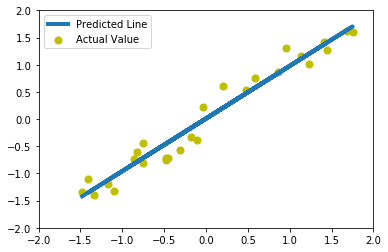

In [7]:
model = RegressionModel(x_train, y_train)
model.train(5000)

# 7. Model Performance

In [8]:
print("Train Accuracy = {}".format(model.r2_score()))
print("Test  Accuracy = {}".format(model.r2_score(x_test, y_test)))

Train Accuracy = Accuracy = 95.62%
Test  Accuracy = Accuracy = 97.42%


# 8. Model Train Plot

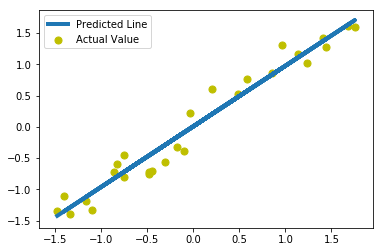

In [9]:
model.show()

# 9. Model Test Plot

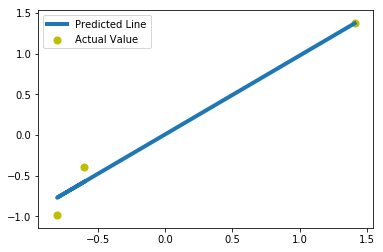

In [10]:
model.show(x_test, y_test)

# 10. Model True Prediction (Without Normalization)  

In [11]:
print(model.pred(x_test, real=True))
print(y_test)

[[61351.22772802]
 [59349.89703899]
 [81364.53461833]]
     Salary
10  63218.0
9   57189.0
18  81363.0
